In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
df = pd.read_csv(r'../../data/tidy/fuel-tickets-oct2021-sep2022.csv', delimiter=',', skiprows=0, low_memory=False)

In [8]:
df_clean = pd.read_csv(r'../../data/tidy/fuel-tickets-clean-oct2021-sep2022.csv', delimiter=',', skiprows=0, low_memory=False)

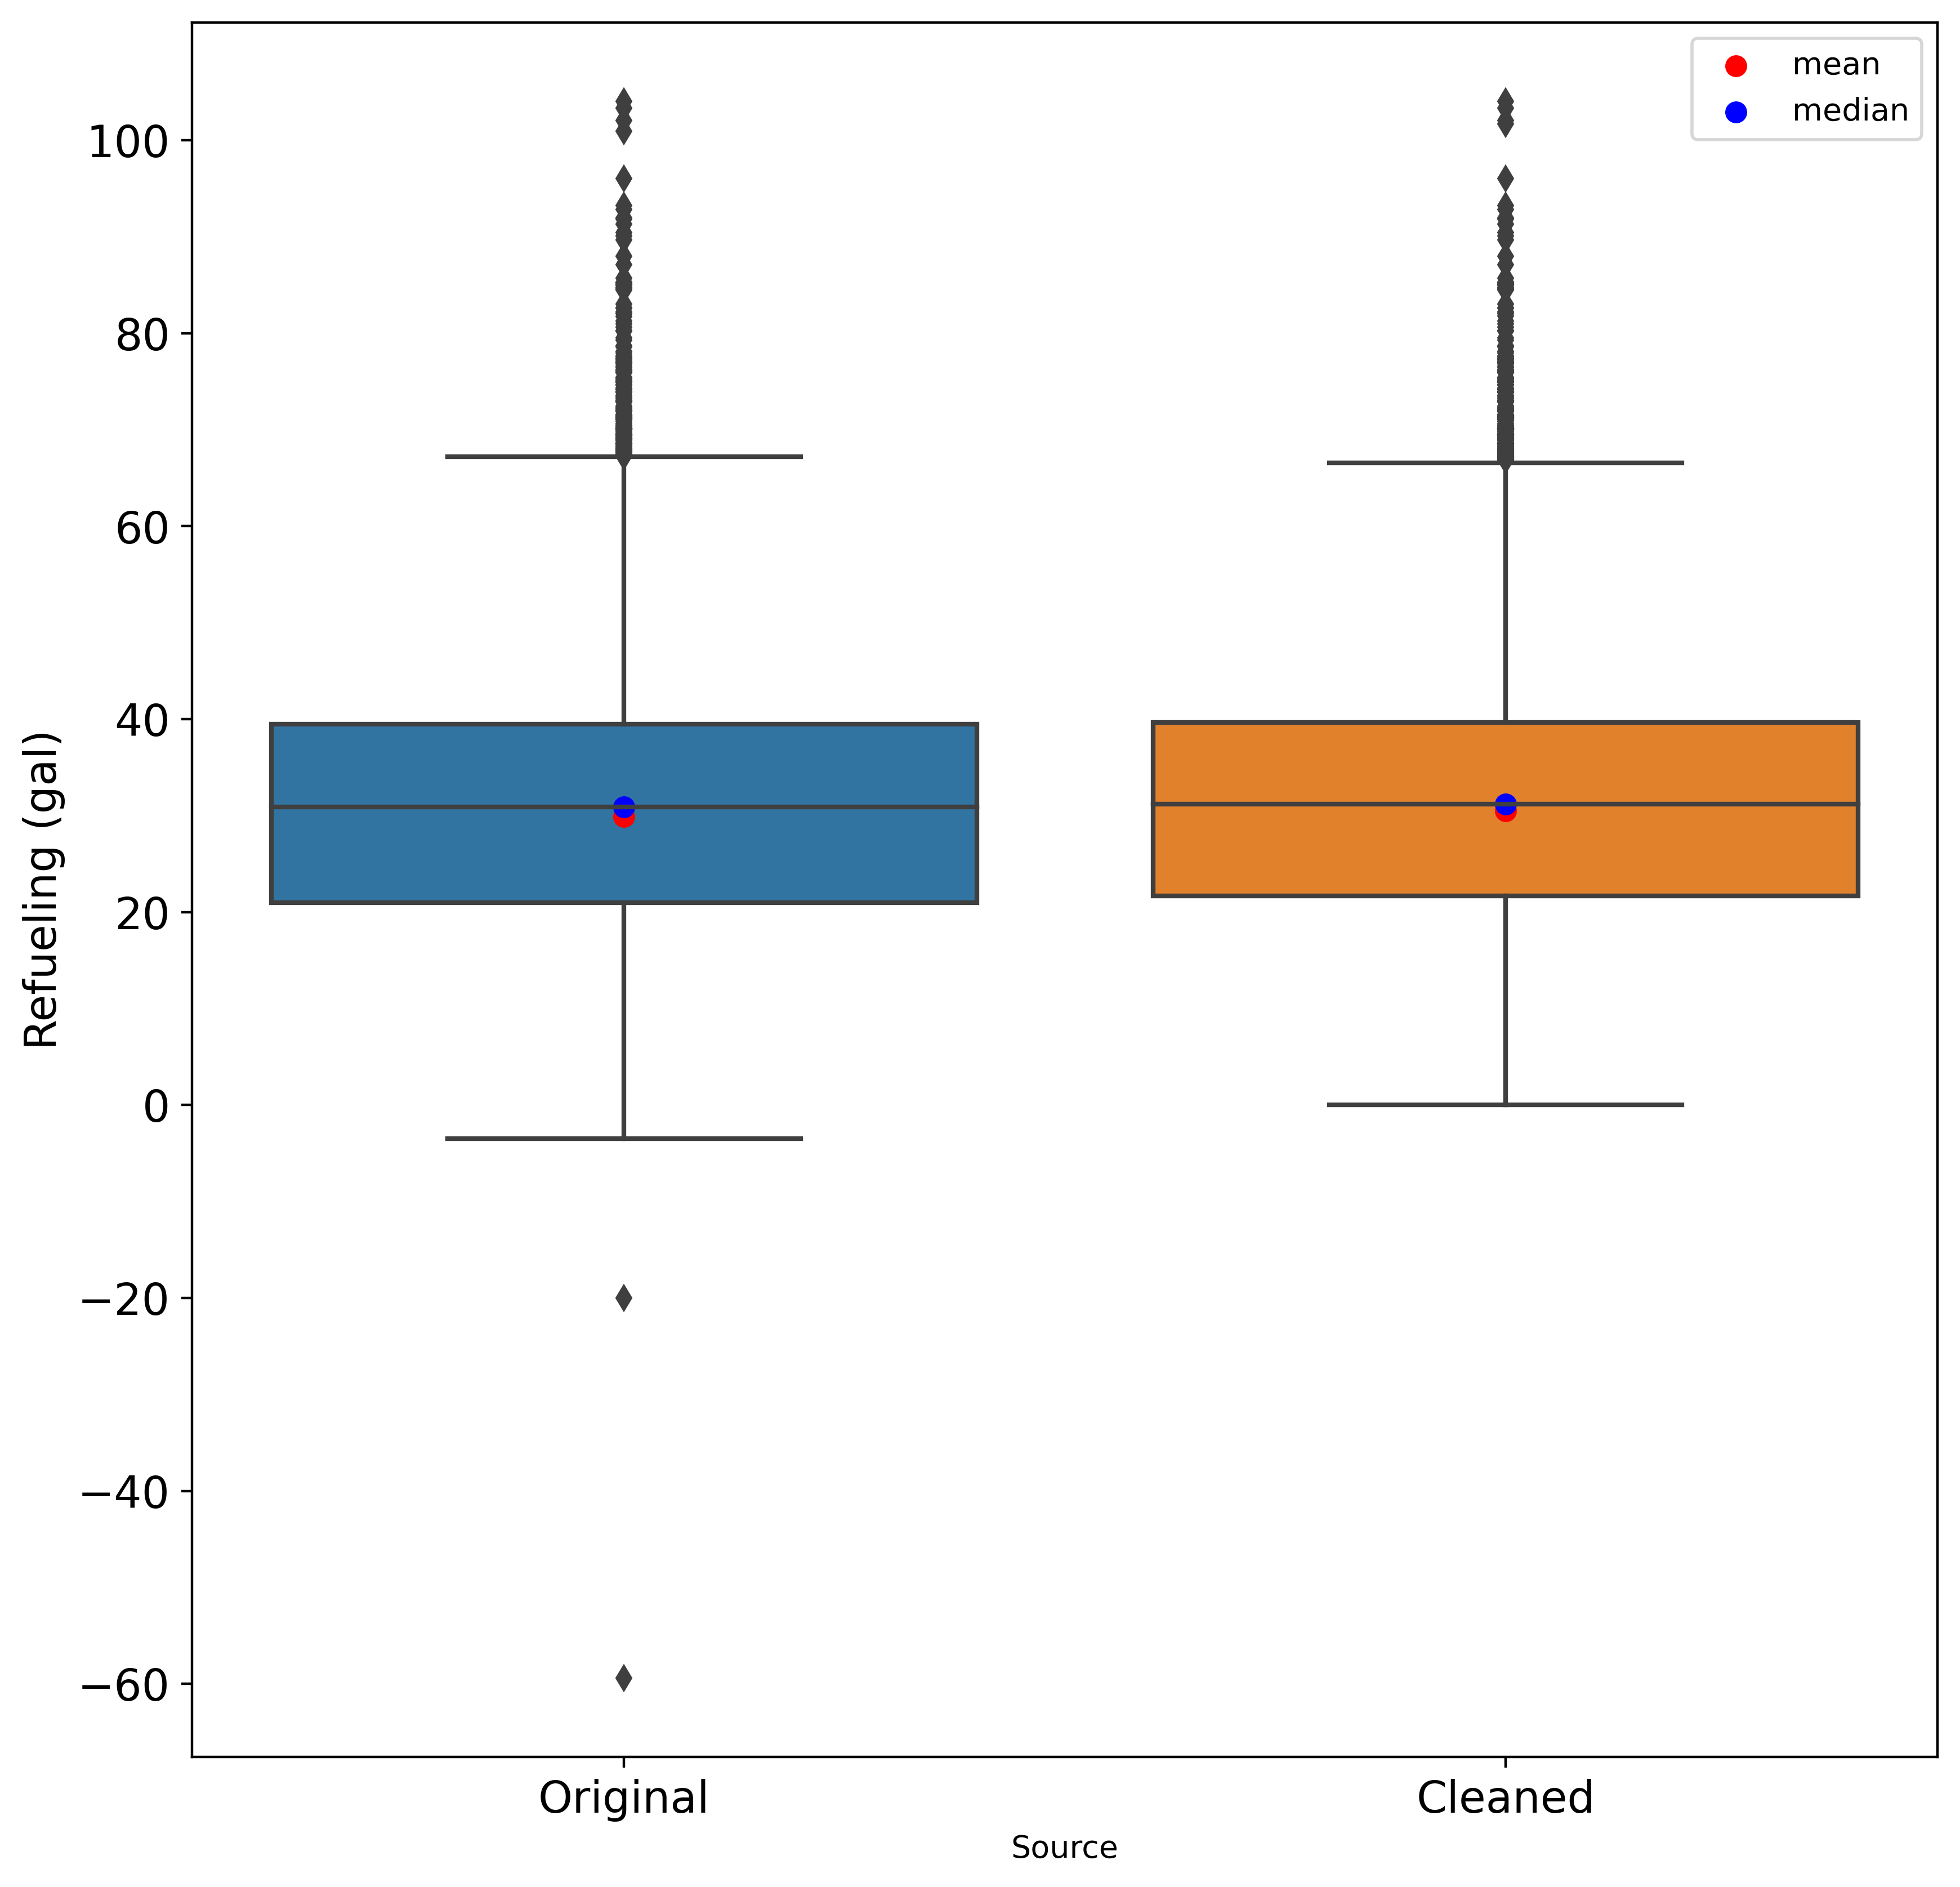

In [9]:

# Combine original and cleaned dataframes and add a column to indicate source
df['Source'] = 'Original'
df_clean['Source'] = 'Cleaned'
df_combined = pd.concat([df, df_clean])

# Calculate mean and median
mean_original = df['Qty'].mean()
mean_cleaned = df_clean['Qty'].mean()
median_original = df['Qty'].median()
median_cleaned = df_clean['Qty'].median()

# Plot data
plt.figure(figsize=(10, 10), dpi=400)
sns.boxplot(x='Source', y='Qty', data=df_combined)

# Add mean and median
plt.scatter(['Original', 'Cleaned'], [mean_original, mean_cleaned], color='red', label='mean')
plt.scatter(['Original', 'Cleaned'], [median_original, median_cleaned], color='blue', label='median')

plt.ylabel('Refueling (gal)', fontsize=14)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Refueling')
plt.legend()
plt.show()


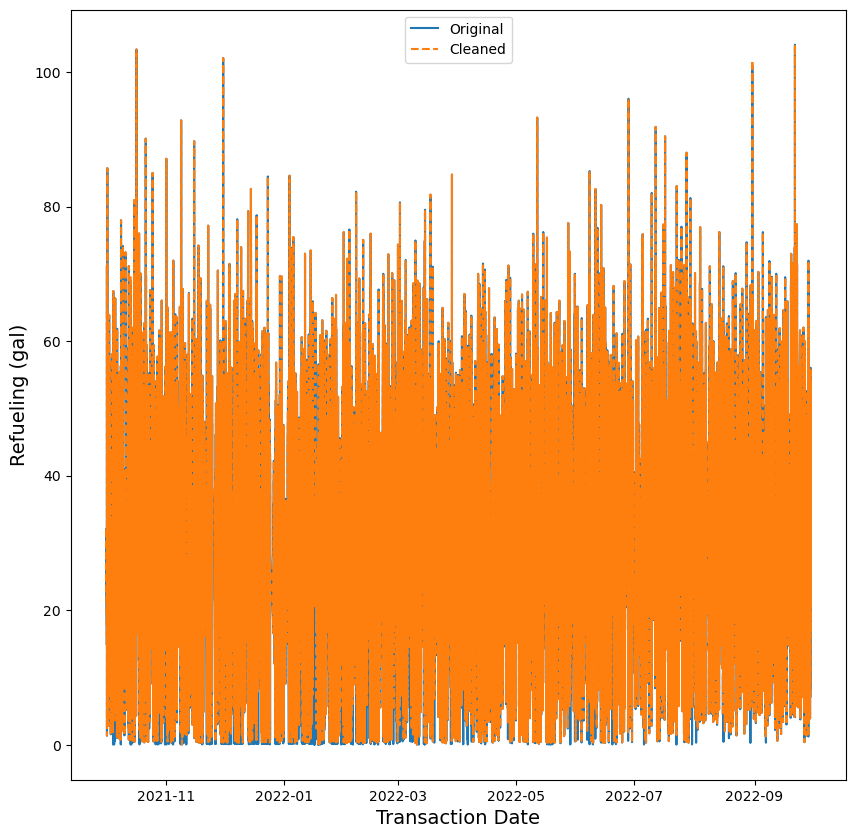

In [10]:
# Ensure that 'Transaction Date' is in datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df_clean['Transaction Date'] = pd.to_datetime(df_clean['Transaction Date'])

# Group data by Transaction Date and take the mean of the Quantity
df_grouped = df.groupby('Transaction Date')['Qty'].mean().reset_index()
df_clean_grouped = df_clean.groupby('Transaction Date')['Qty'].mean().reset_index()

# Plot data
plt.figure(figsize=(10, 10))
plt.plot(df_grouped['Transaction Date'], df_grouped['Qty'], label='Original')
plt.plot(df_clean_grouped['Transaction Date'], df_clean_grouped['Qty'], label='Cleaned', linestyle='--')

plt.xlabel('Transaction Date', fontsize=14)
plt.ylabel('Refueling (gal)', fontsize=14)
plt.legend()
plt.show()


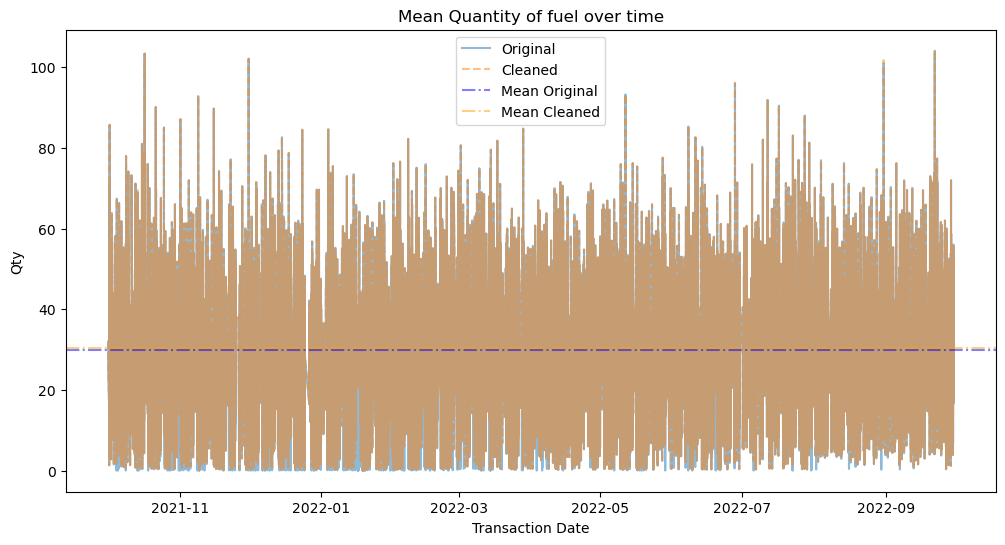

In [11]:
import matplotlib.pyplot as plt

# Ensure that 'Transaction Date' is in datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df_clean['Transaction Date'] = pd.to_datetime(df_clean['Transaction Date'])

# Group data by Transaction Date and take the mean of the Quantity
df_grouped = df.groupby('Transaction Date')['Qty'].mean().reset_index()
df_clean_grouped = df_clean.groupby('Transaction Date')['Qty'].mean().reset_index()

# Calculate mean of Qty in both dataframes
mean_df = df['Qty'].mean()
mean_df_clean = df_clean['Qty'].mean()

# Plot data
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['Transaction Date'], df_grouped['Qty'], label='Original', alpha=0.5)
plt.plot(df_clean_grouped['Transaction Date'], df_clean_grouped['Qty'], label='Cleaned', linestyle='--', alpha=0.5)

# Add mean lines
plt.axhline(mean_df, color='blue', linestyle='-.', label='Mean Original', alpha=0.5)
plt.axhline(mean_df_clean, color='orange', linestyle='-.', label='Mean Cleaned', alpha=0.5)

plt.title('Mean Quantity of fuel over time')
plt.xlabel('Transaction Date')
plt.ylabel('Qty')
plt.legend()
plt.show()


In [12]:
df_clean

,Unnamed: 0,Equipment ID,Qty,Transaction Date,Meter1Reading,Fuel Orfluid Type,Source
0,0,7610,27.40,2021-10-01 20:02:00,498070,DIE,Cleaned
1,1,7610,56.20,2021-10-09 13:59:00,498369,DIE,Cleaned
2,2,7610,2.50,2021-10-12 20:02:00,498591,DIE,Cleaned
3,3,7610,40.10,2021-10-12 20:05:00,498591,DIE,Cleaned
4,4,7610,12.60,2021-10-13 16:09:00,498655,DIE,Cleaned
...,...,...,...,...,...,...,...
27842,28346,1864,4.81,2022-09-23 15:37:00,21762,DIE,Cleaned
27843,28347,1864,9.01,2022-09-26 15:58:00,21810,DIE,Cleaned
27844,28348,1864,32.73,2022-09-27 22:20:00,21976,DIE,Cleaned
27845,28349,1864,40.55,2022-09-28 21:48:00,22140,DIE,Cleaned


In [14]:
df

,Unnamed: 0,Equipment ID,Qty,Transaction Date,Meter1Reading,Fuel Orfluid Type,Source
0,0,7610,27.40,2021-10-01 20:02:00,498070,DIE,Original
1,1,7610,56.20,2021-10-09 13:59:00,498369,DIE,Original
2,2,7610,2.50,2021-10-12 20:02:00,498591,DIE,Original
3,3,7610,40.10,2021-10-12 20:05:00,498591,DIE,Original
4,4,7610,12.60,2021-10-13 16:09:00,498655,DIE,Original
...,...,...,...,...,...,...,...
28346,28346,1864,4.81,2022-09-23 15:37:00,21762,DIE,Original
28347,28347,1864,9.01,2022-09-26 15:58:00,21810,DIE,Original
28348,28348,1864,32.73,2022-09-27 22:20:00,21976,DIE,Original
28349,28349,1864,40.55,2022-09-28 21:48:00,22140,DIE,Original


In [43]:
example=df.loc[df['Equipment ID']==7610]
example_clean=df_clean.loc[df['Equipment ID']==7610]
example['Month'] = pd.to_datetime(example['Transaction Date']).dt.month
example_clean['Month'] = pd.to_datetime(example_clean['Transaction Date']).dt.month
example=example.loc[example['Month']==1]
example_clean=example_clean.loc[example_clean['Month']==1]

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_32436\476356132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example['Month'] = pd.to_datetime(example['Transaction Date']).dt.month
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_32436\476356132.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example_clean['Month'] = pd.to_datetime(example_clean['Transaction Date']).dt.month


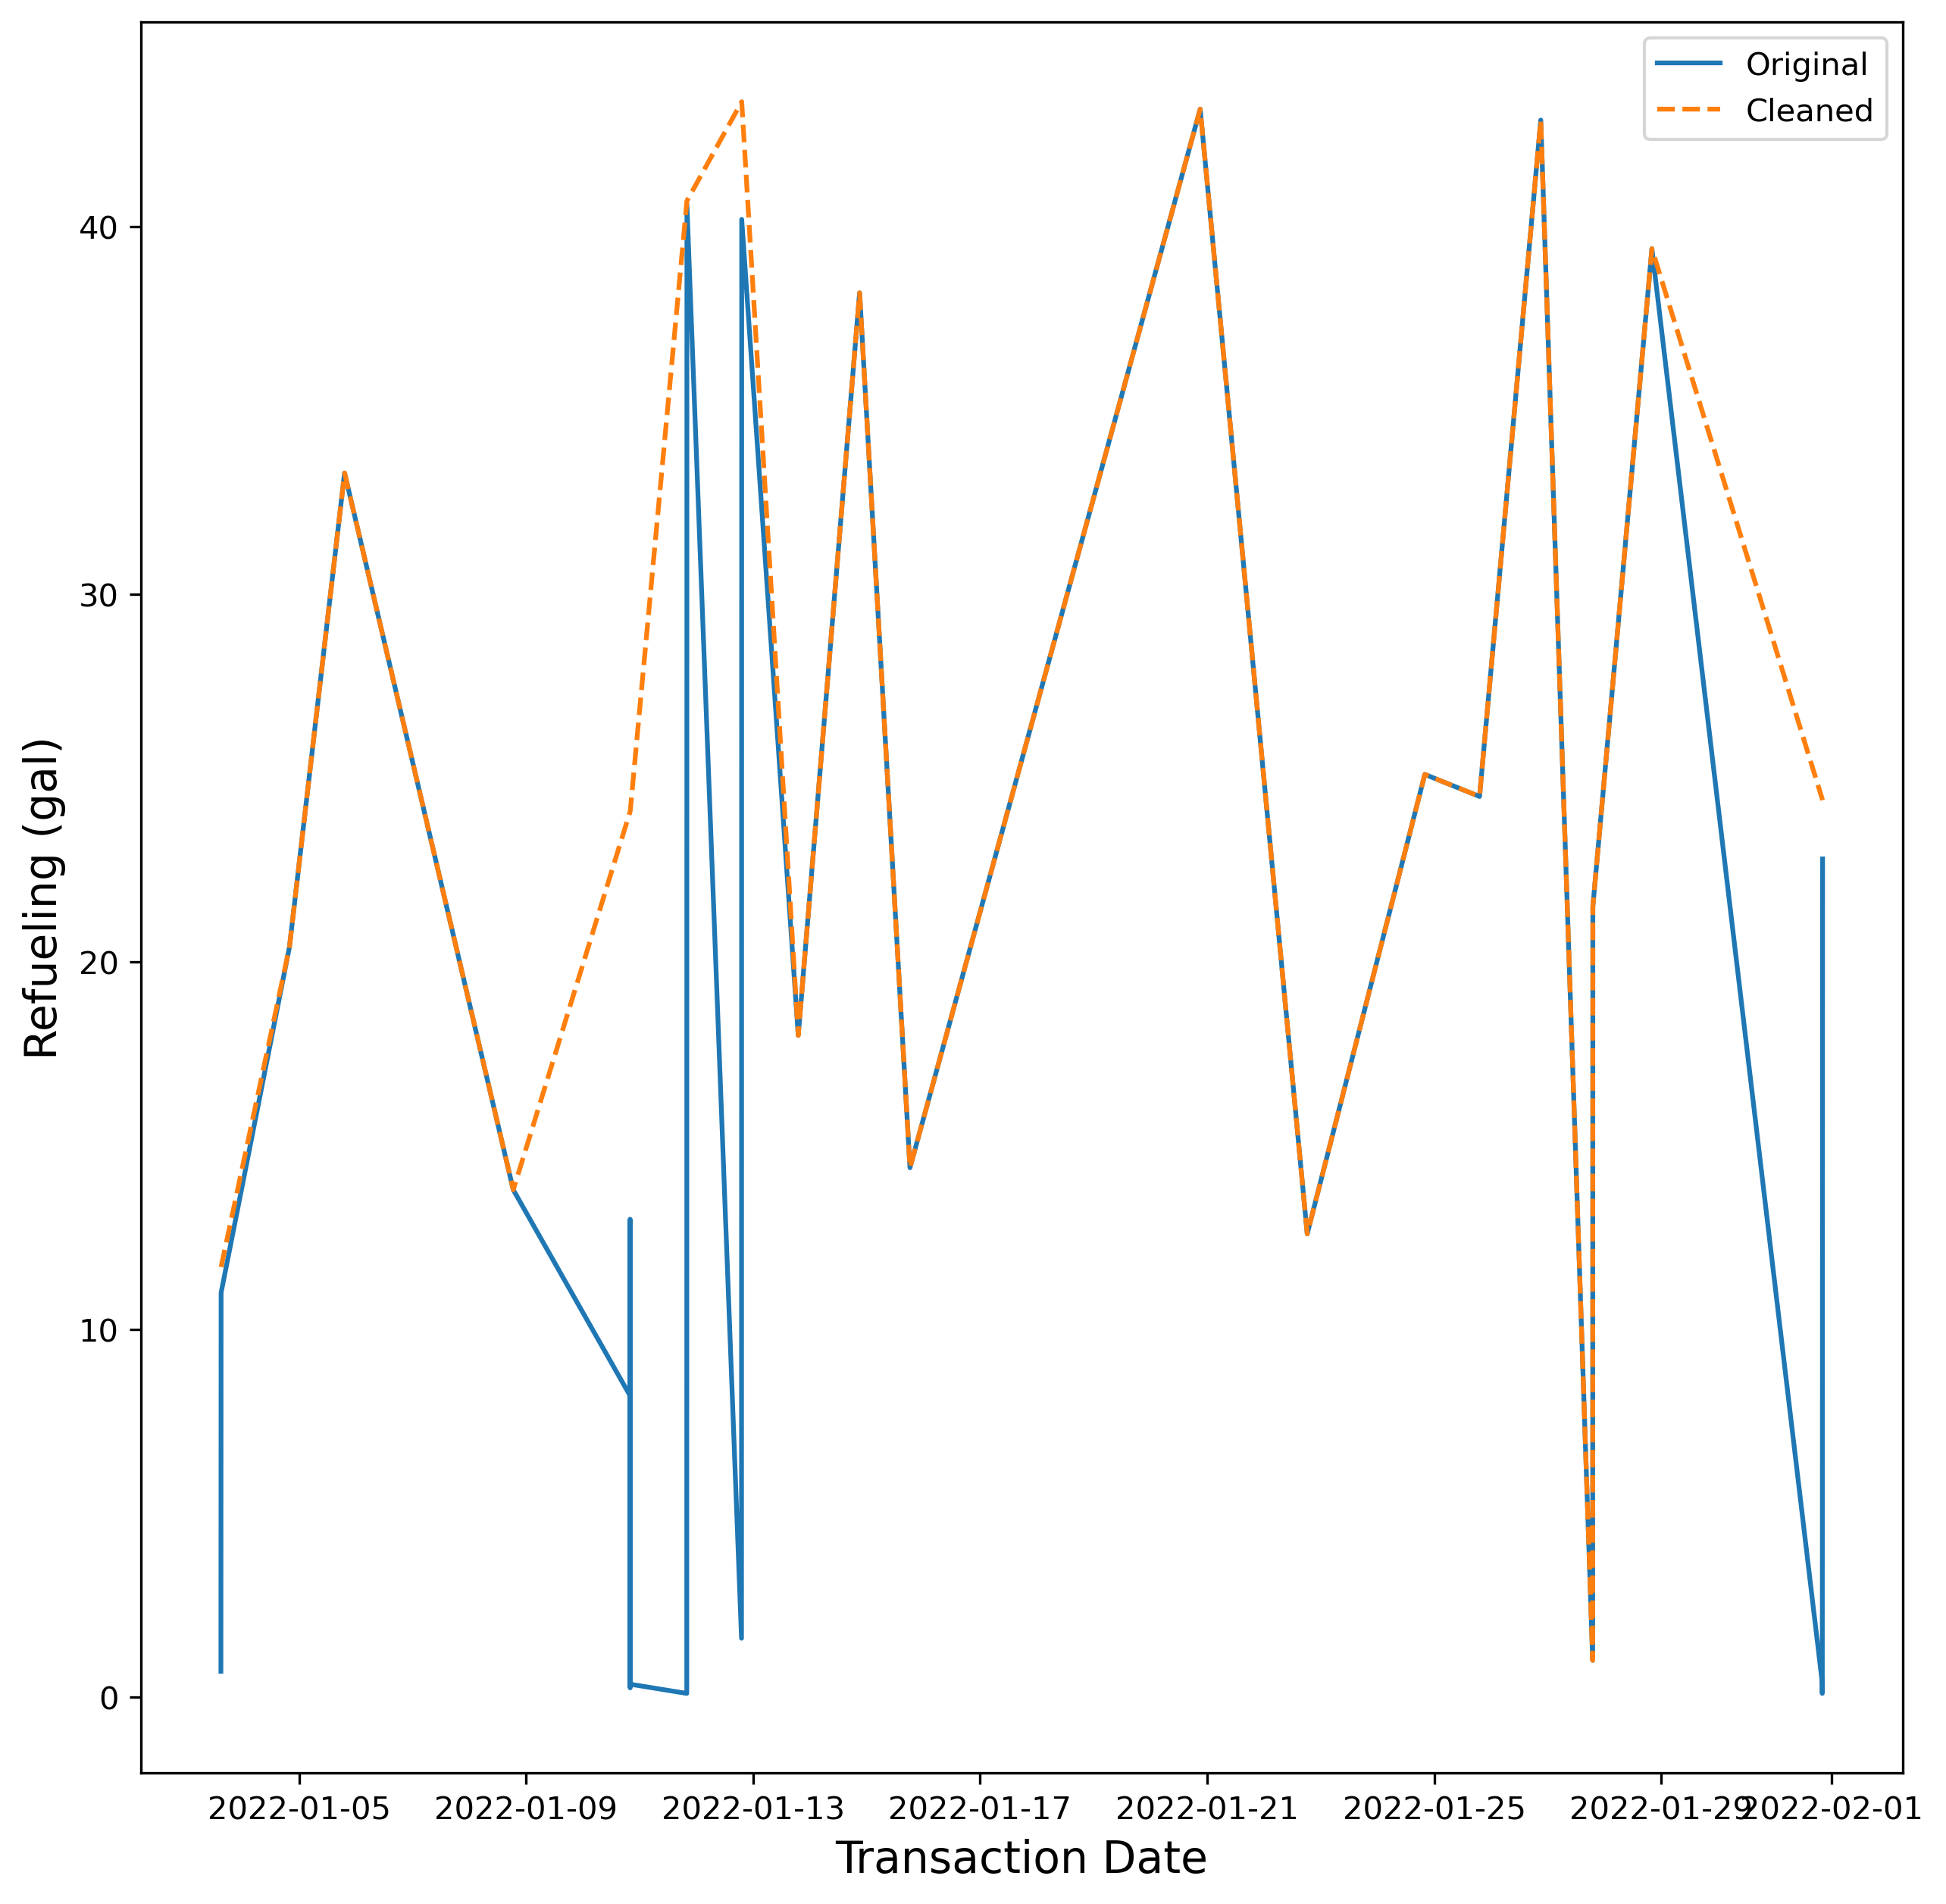

In [46]:
# Ensure that 'Transaction Date' is in datetime format
example['Transaction Date'] = pd.to_datetime(example['Transaction Date'])
example_clean['Transaction Date'] = pd.to_datetime(example_clean['Transaction Date'])

# Group data by Transaction Date and take the mean of the Quantity
df_grouped = example.groupby('Transaction Date')['Qty'].mean().reset_index()
df_clean_grouped = example_clean.groupby('Transaction Date')['Qty'].mean().reset_index()

# Plot data
plt.figure(figsize=(10, 10), dpi=300)
plt.plot(df_grouped['Transaction Date'], df_grouped['Qty'], label='Original')
plt.plot(df_clean_grouped['Transaction Date'], df_clean_grouped['Qty'], label='Cleaned', linestyle='--')

plt.xlabel('Transaction Date', fontsize=14)
plt.ylabel('Refueling (gal)', fontsize=14)
plt.legend()
plt.show()


In [96]:
example = df.loc[df['Equipment ID'] == 7610].copy()
example_clean = df_clean.loc[df_clean['Equipment ID'] == 7610].copy()

example['date'] = pd.to_datetime(example['Transaction Date']).dt.date
example_clean['date'] = pd.to_datetime(example_clean['Transaction Date']).dt.date


In [97]:
date=pd.to_datetime("2022-01-12").date()
example=example.loc[example['date']==date]
example_clean=example_clean.loc[example_clean['date']==date]

In [98]:
example

,Unnamed: 0,Equipment ID,Qty,Transaction Date,Meter1Reading,Fuel Orfluid Type,Source,date
75,75,7610,0.1,2022-01-12 19:06:00,506921,DIE,Original,2022-01-12
76,76,7610,3.1,2022-01-12 19:06:00,506921,DIE,Original,2022-01-12
77,77,7610,40.2,2022-01-12 19:11:00,0,DIE,Original,2022-01-12


In [107]:
example_clean

,Unnamed: 0,Equipment ID,Qty,Transaction Date,Meter1Reading,Fuel Orfluid Type,Source,date
60,77,7610,43.4,2022-01-12 19:11:00,0,DIE,Cleaned,2022-01-12


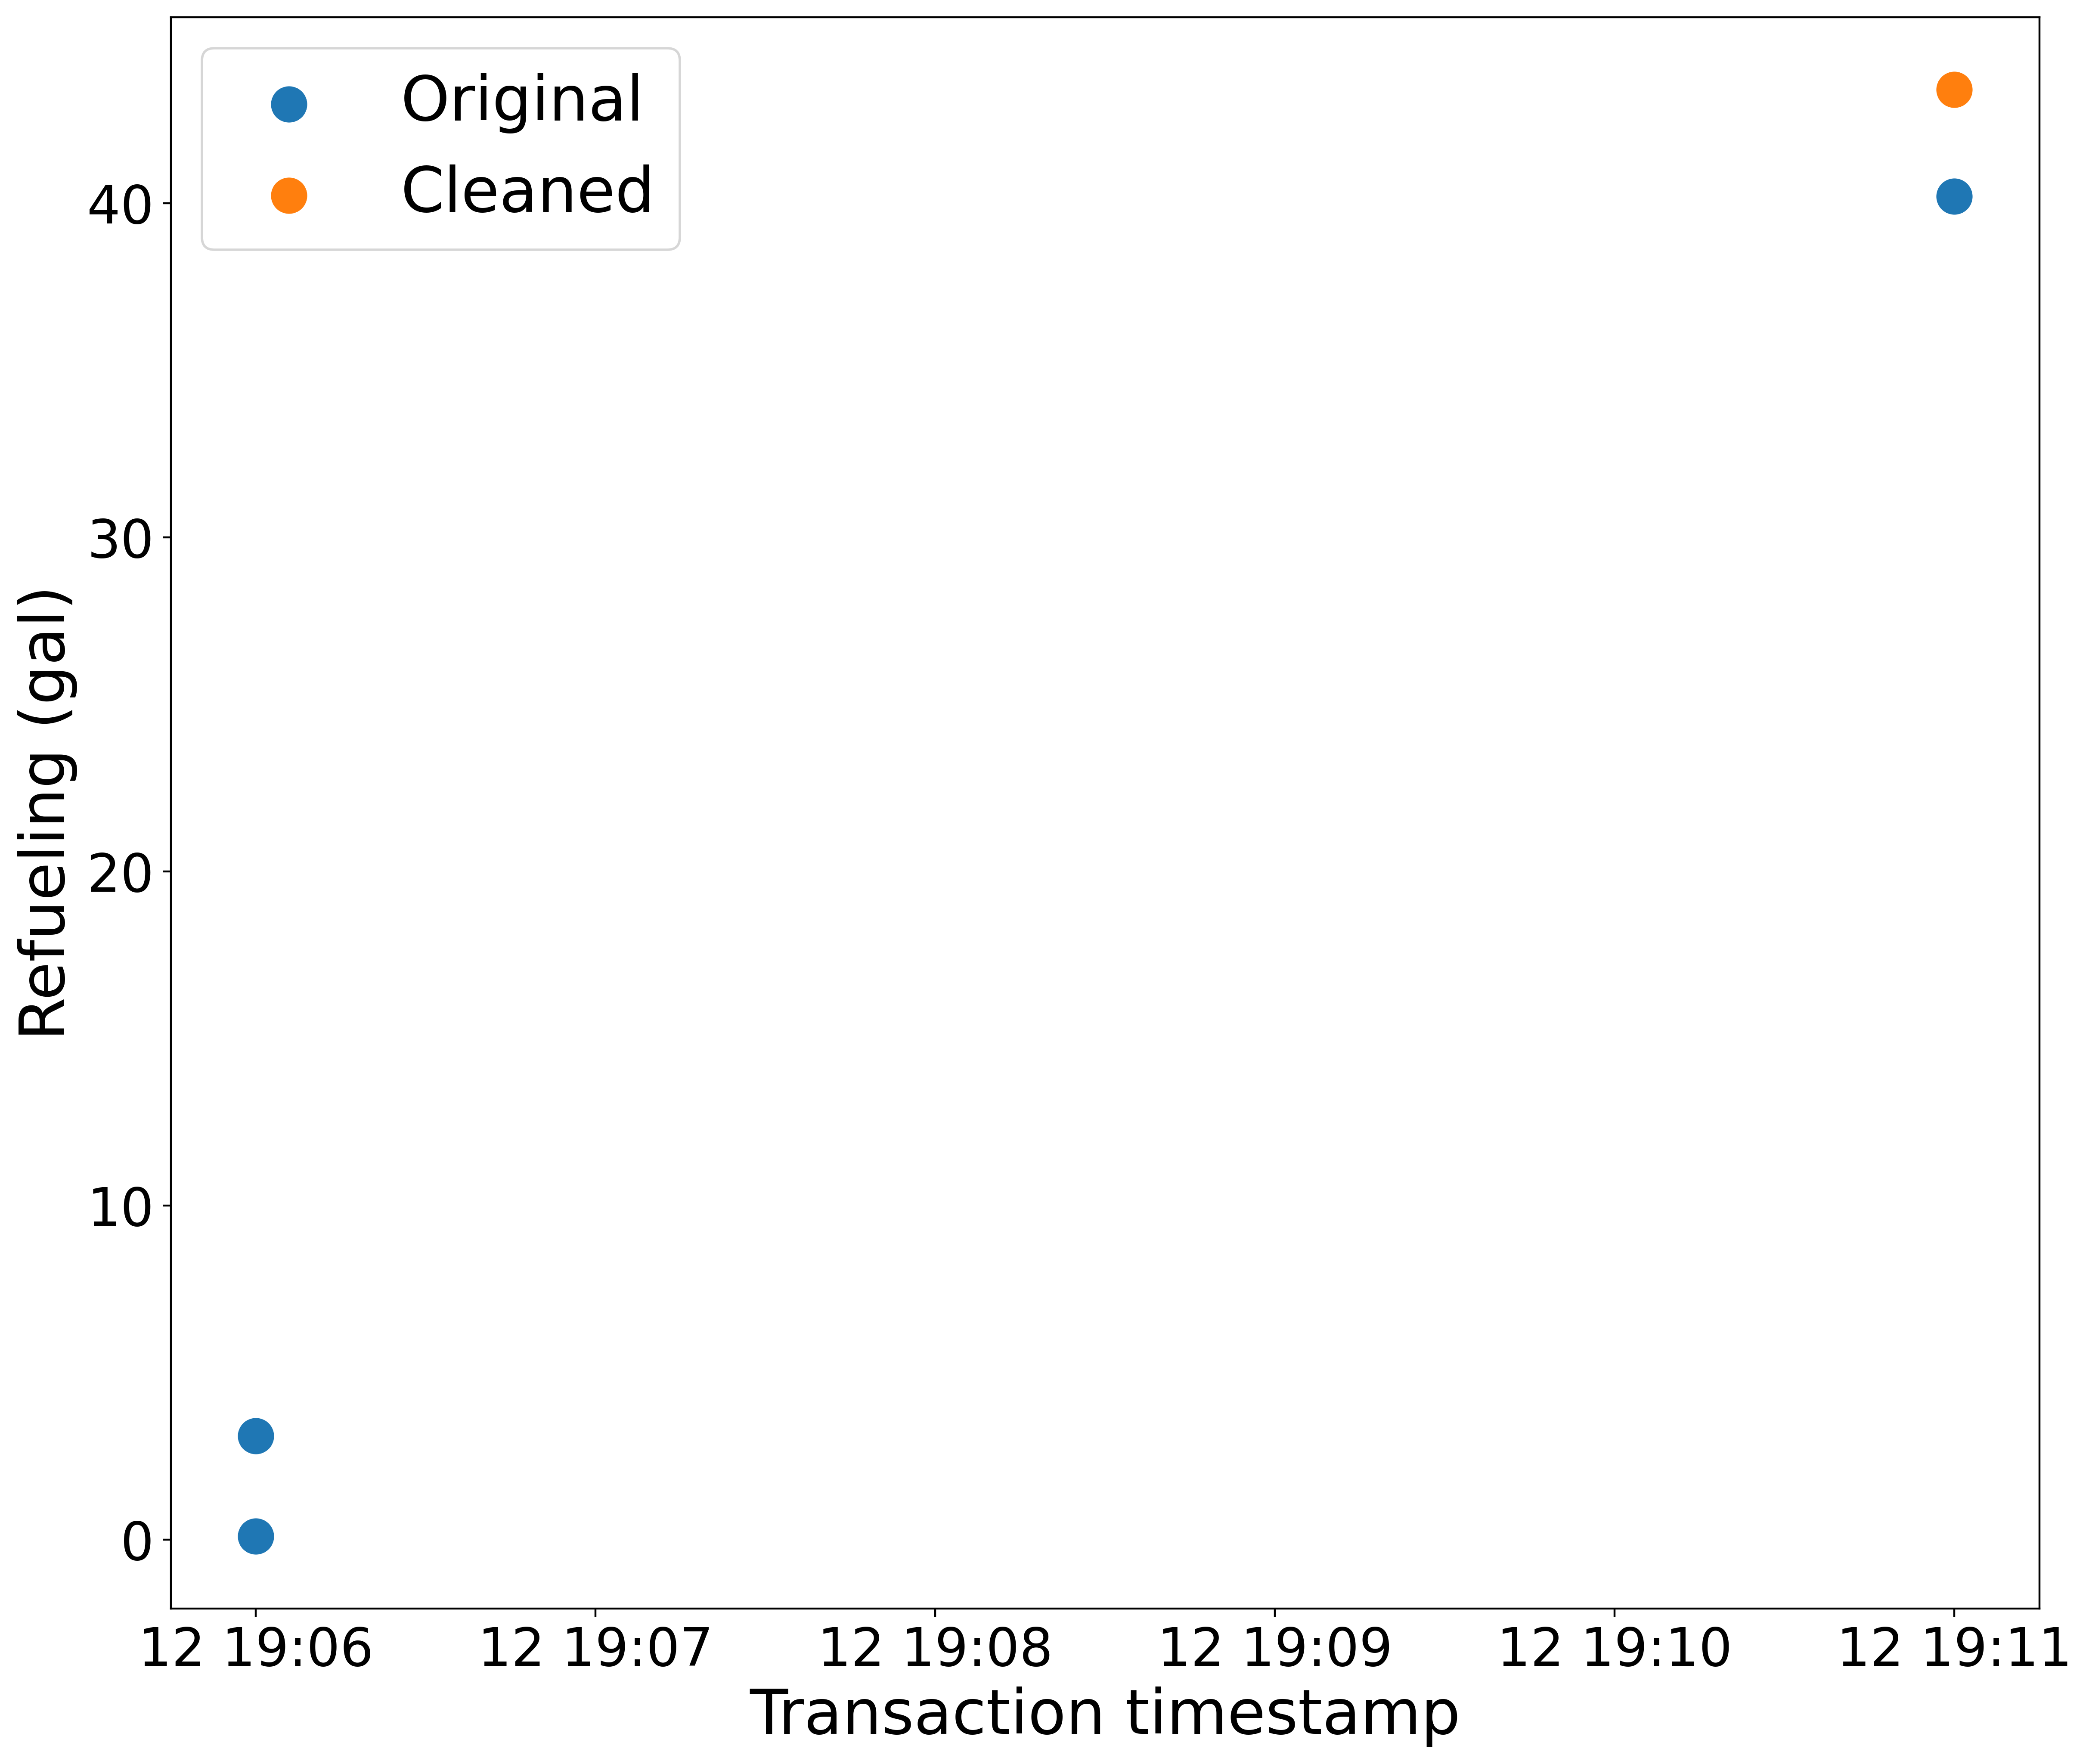

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12), dpi=400)

plt.scatter(example['Transaction Date'], example['Qty'], label='Original', s=200)
plt.scatter(example_clean['Transaction Date'], example_clean['Qty'], label='Cleaned', s=200)

plt.xlabel('Transaction timestamp', fontsize=26)
plt.ylabel('Refueling (gal)', fontsize=26)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.legend(fontsize=26)

plt.show()


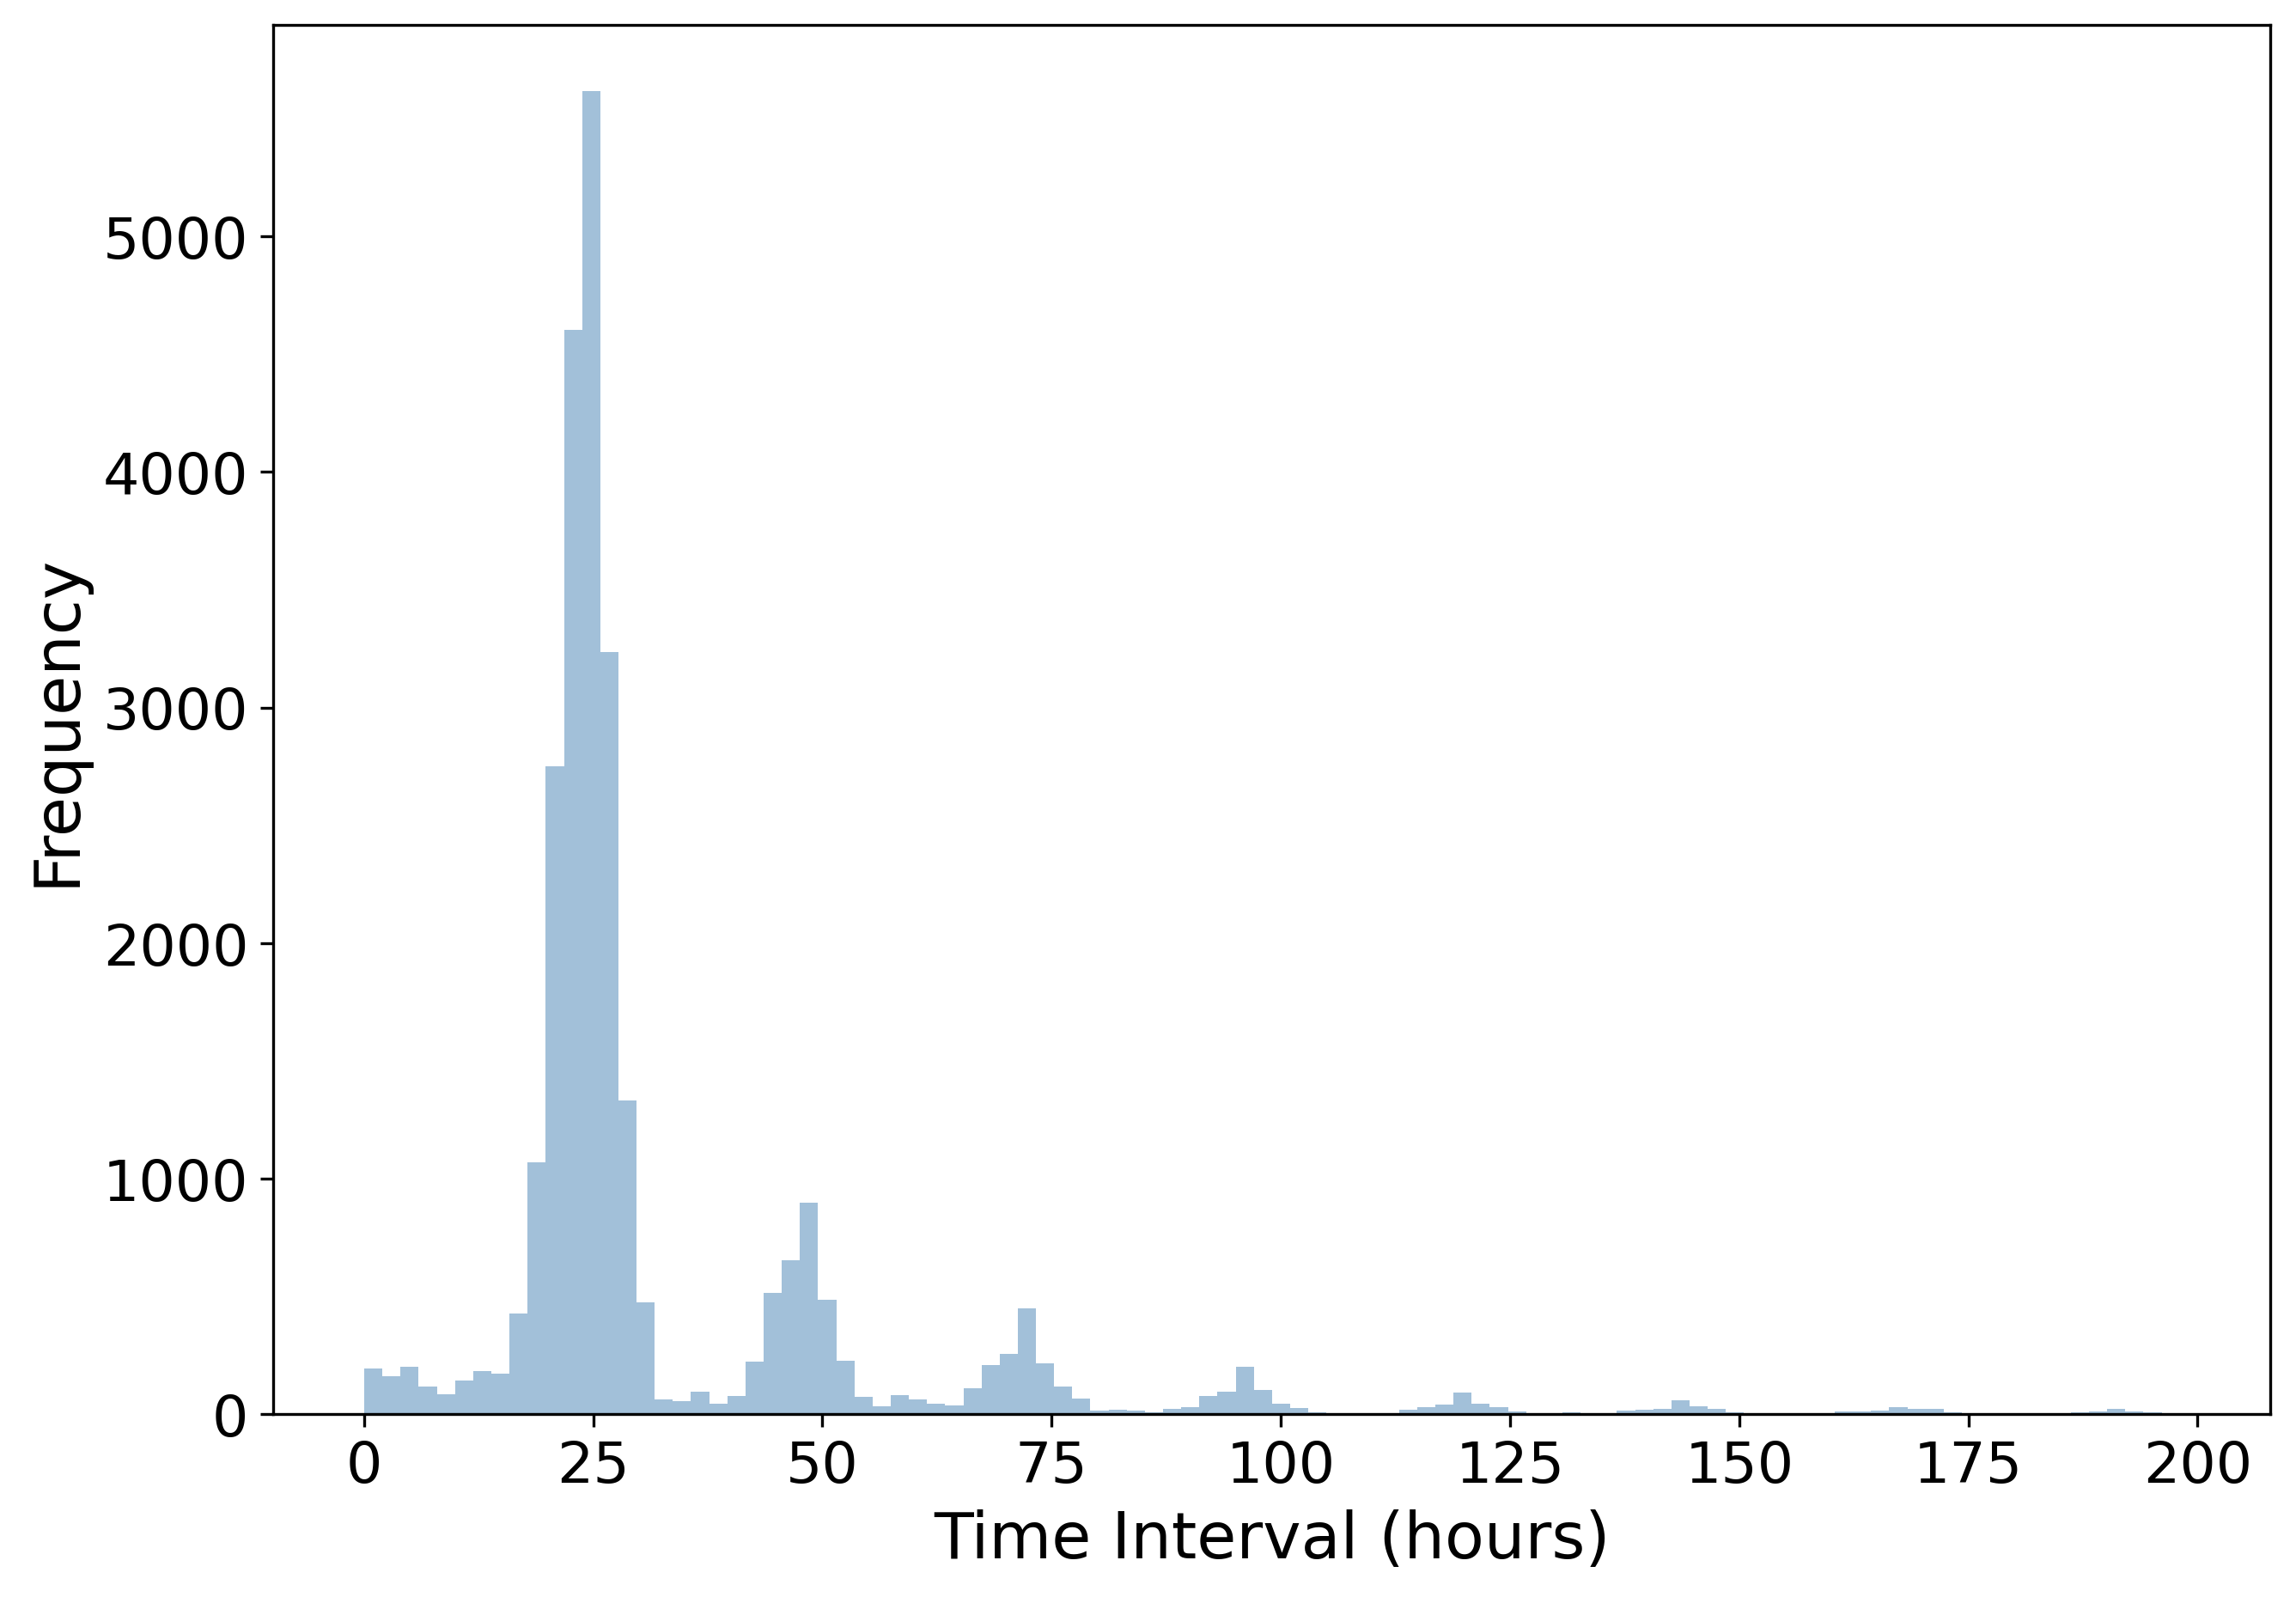

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Transaction Date' to datetime if it's not already
df_clean['Transaction Date'] = pd.to_datetime(df_clean['Transaction Date'])

# Get unique vehicle IDs
vehicle_ids = df_clean['Equipment ID'].unique()

# List to store all intervals across all vehicles
all_intervals = []

# Calculate time intervals for each vehicle
for vehicle_id in vehicle_ids:
    # Select data for this vehicle
    vehicle_df = df_clean.loc[df_clean['Equipment ID'] == vehicle_id].copy()
    
    # Calculate time intervals in hours
    vehicle_df['Time Interval'] = vehicle_df['Transaction Date'].diff().dt.total_seconds() / 3600
    
    # Drop rows where time interval is zero
    vehicle_df = vehicle_df.loc[vehicle_df['Time Interval'] > 0]

    # Append intervals to all_intervals list
    all_intervals += list(vehicle_df['Time Interval'].dropna())

# Create a figure and set its size
plt.figure(figsize=(10, 7), dpi=300)

# Plot histogram for intervals less than 500 hours
plt.hist([x for x in all_intervals if x < 200], bins=100, alpha=0.5, color='steelblue')

# Set the labels and title
plt.xlabel('Time Interval (hours)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks( fontsize=16)
plt.yticks(fontsize=16)

#plt.title('Histogram of Time Intervals for All Vehicles', fontsize=18)

# Show the plot
plt.show()
